In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
%matplotlib inline

In [24]:
filepath = "datasets/wine.csv"
df = pd.read_csv(filepath)
df = df.drop("index", axis = 1)
df = df.sample(frac=1, random_state = 42, ignore_index=True)

In [25]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [26]:
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
Counter({8: 2836, 5: 2836, 7: 2836, 6: 2836, 4: 2836, 3: 2836, 9: 2836})


In [4]:
pd.unique(y)

array([8, 5, 7, 6, 4, 3, 9], dtype=int64)

In [28]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
19847,0,0,0,0,0,0,1
19848,0,0,0,0,0,0,1
19849,0,0,0,0,0,0,1
19850,0,0,0,0,0,0,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13896, 11)
(5956, 11)
(13896, 7)
(5956, 7)


In [30]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
print(X_train.shape)
print(X_test.shape)

(13896, 11)
(5956, 11)


In [31]:
input_dim = X_train.shape[1]

In [32]:
class_num = y.shape[1]
class_num

7

In [33]:
model = Sequential()
model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=class_num,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam',               
              metrics=['accuracy'])

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13896, 11)
(5956, 11)
(13896, 7)
(5956, 7)


In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, shuffle=True, verbose=2)
print(history)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

435/435 - 1s - loss: 1.9079 - accuracy: 0.2042 - val_loss: 1.8607 - val_accuracy: 0.2176
Epoch 2/100
435/435 - 1s - loss: 1.8300 - accuracy: 0.2548 - val_loss: 1.7883 - val_accuracy: 0.2738
Epoch 3/100
435/435 - 1s - loss: 1.7668 - accuracy: 0.2760 - val_loss: 1.7294 - val_accuracy: 0.2920
Epoch 4/100
435/435 - 1s - loss: 1.7062 - accuracy: 0.3073 - val_loss: 1.6754 - val_accuracy: 0.3291
Epoch 5/100
435/435 - 1s - loss: 1.6427 - accuracy: 0.3486 - val_loss: 1.6124 - val_accuracy: 0.3598
Epo

Epoch 75/100
435/435 - 1s - loss: 1.1341 - accuracy: 0.5440 - val_loss: 1.1401 - val_accuracy: 0.5349
Epoch 76/100
435/435 - 1s - loss: 1.1320 - accuracy: 0.5425 - val_loss: 1.1455 - val_accuracy: 0.5290
Epoch 77/100
435/435 - 1s - loss: 1.1311 - accuracy: 0.5423 - val_loss: 1.1361 - val_accuracy: 0.5321
Epoch 78/100
435/435 - 1s - loss: 1.1269 - accuracy: 0.5450 - val_loss: 1.1422 - val_accuracy: 0.5344
Epoch 79/100
435/435 - 1s - loss: 1.1291 - accuracy: 0.5466 - val_loss: 1.1342 - val_accuracy: 0.5359
Epoch 80/100
435/435 - 1s - loss: 1.1288 - accuracy: 0.5444 - val_loss: 1.1309 - val_accuracy: 0.5381
Epoch 81/100
435/435 - 1s - loss: 1.1233 - accuracy: 0.5438 - val_loss: 1.1339 - val_accuracy: 0.5423
Epoch 82/100
435/435 - 1s - loss: 1.1228 - accuracy: 0.5489 - val_loss: 1.1357 - val_accuracy: 0.5401
Epoch 83/100
435/435 - 1s - loss: 1.1198 - accuracy: 0.5480 - val_loss: 1.1335 - val_accuracy: 0.5349
Epoch 84/100
435/435 - 1s - loss: 1.1188 - accuracy: 0.5476 - val_loss: 1.1209 - v

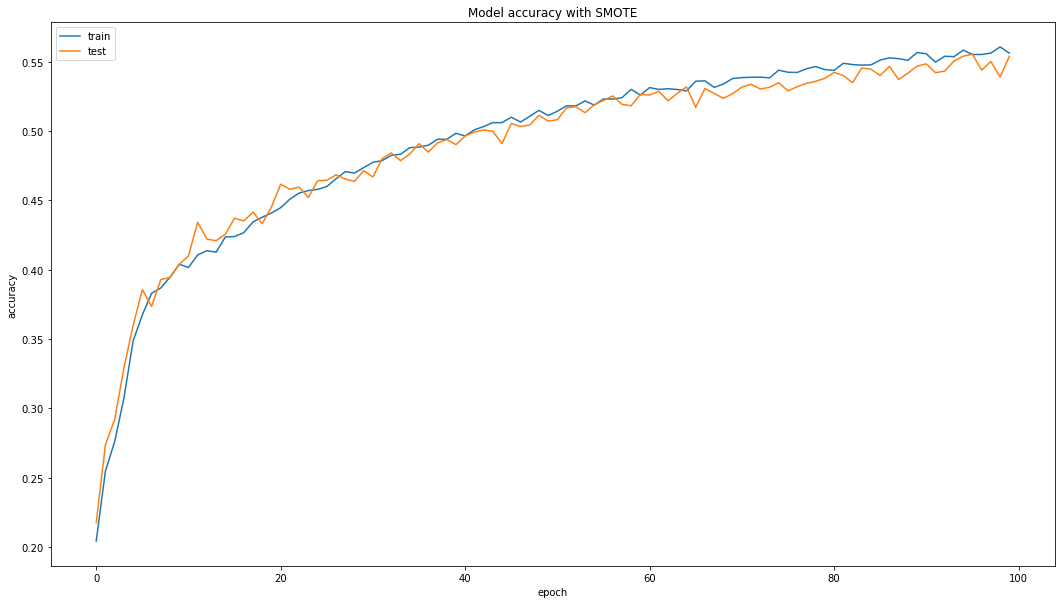

In [54]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with SMOTE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

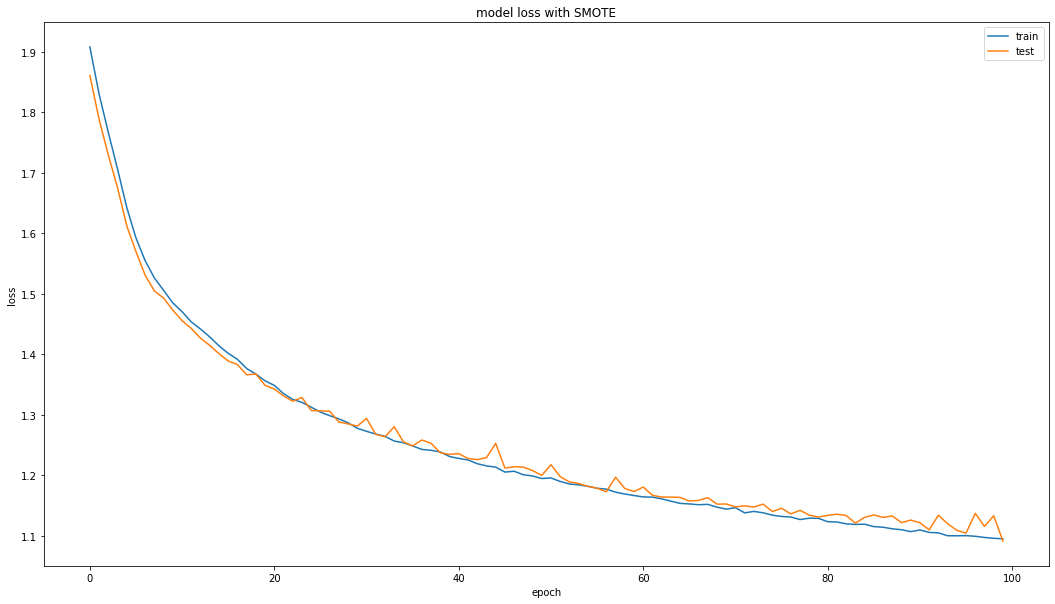

In [53]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with SMOTE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

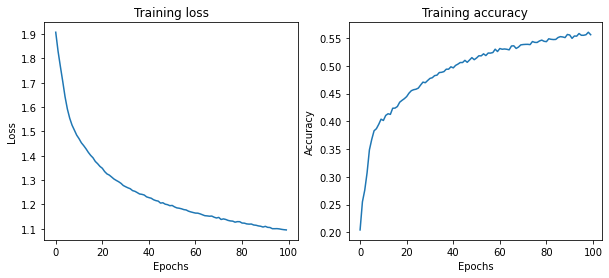

In [39]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

In [40]:
loss_train_score, accuracy_train_score  = model.evaluate(X_train, y_train, verbose=0)
print(loss_train_score, accuracy_train_score)

1.0765684843063354 0.5672855377197266


In [41]:
loss_test_score, accuracy_test_score  = model.evaluate(X_test, y_test, verbose=0)
print(loss_test_score, accuracy_test_score)

1.0912716388702393 0.5538952350616455


In [42]:
predictions = model.predict(X_test)
print(type(predictions))
predictions

<class 'numpy.ndarray'>


array([[1.5590418e-05, 3.1956073e-04, 1.1181589e-03, ..., 1.8559780e-02,
        2.5475333e-02, 9.4495547e-01],
       [1.7663968e-03, 5.2378029e-03, 1.0858099e-02, ..., 3.0266383e-01,
        5.4719591e-01, 8.3553983e-05],
       [1.0277211e-04, 4.4002247e-04, 1.5626589e-03, ..., 5.7379410e-02,
        6.3437484e-02, 8.5820526e-01],
       ...,
       [2.3718603e-02, 5.3317338e-02, 1.1289576e-01, ..., 3.5894030e-01,
        5.3327557e-02, 1.4604791e-19],
       [2.9416857e-04, 9.5182406e-03, 2.5966251e-02, ..., 3.4187111e-01,
        3.8131157e-01, 1.7914584e-08],
       [2.0687358e-02, 5.7294869e-01, 2.6989546e-01, ..., 1.4506163e-02,
        2.7741917e-04, 0.0000000e+00]], dtype=float32)

In [15]:
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>


In [44]:
y_test_cm = y_test.to_numpy()

In [45]:
print(y_test_cm.shape)
print(predictions.shape)

(5956, 7)
(5956, 7)


In [46]:
confusion_matrix(y_test_cm.argmax(axis=1), predictions.argmax(axis=1))

array([[618,  97,  50,  55,   0,  11,   0],
       [ 87, 481, 181,  64,  10,  18,   2],
       [ 71, 197, 382, 133,  35,  31,   9],
       [ 53,  66, 192, 192, 125, 175,  35],
       [ 29,  25,  43, 148, 219, 319,  48],
       [ 15,  15,  75,  57,  99, 561,  71],
       [  0,   0,   0,   0,   0,  16, 846]], dtype=int64)

In [47]:
conf_matrix = tf.math.confusion_matrix(labels=y_test_cm.argmax(axis=1),
                                       predictions=predictions.argmax(axis=1))

In [48]:
conf_matrix

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[618,  97,  50,  55,   0,  11,   0],
       [ 87, 481, 181,  64,  10,  18,   2],
       [ 71, 197, 382, 133,  35,  31,   9],
       [ 53,  66, 192, 192, 125, 175,  35],
       [ 29,  25,  43, 148, 219, 319,  48],
       [ 15,  15,  75,  57,  99, 561,  71],
       [  0,   0,   0,   0,   0,  16, 846]])>

In [25]:
plot_confusion_matrix(model, X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'max'

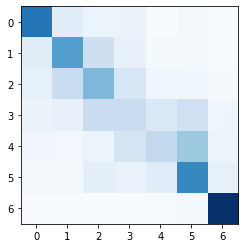

In [52]:
labels = ['3',"4","5","6","7","8","9"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

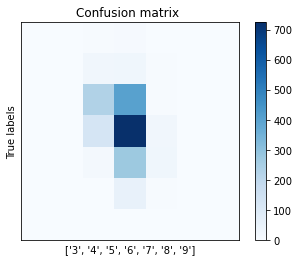

In [38]:
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.xlabel(labels)
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
# # Accuracy calculated using Keras' method
# metric = tf.keras.metrics.Accuracy()
# metric.update_state(yTrue,yPred)
# metric.result().numpy(

In [ ]:
# model = Sequential()
# model.add(Flatten())
# model.add(Dense(units=class_num,activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',               
#               metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, shuffle=False, verbose=0)
# print(history)
# loss_train_score, accuracy_train_score  = model.evaluate(X_train, y_train, verbose=0)
# print(loss_train_score, accuracy_train_score)
# loss_test_score, accuracy_test_score  = model.evaluate(X_test, y_test, verbose=0)
# print(loss_test_score, accuracy_test_score)